In [3]:
using MAT
using Images
using LinearAlgebra
using GLMakie
using Plots; 


# using Makie
# using AbstractPlotting
# AbstractPlotting.inline!(false)

In [29]:
include("./julia/Skeleton3D.jl")

pk_get_nh (generic function with 1 method)

In [30]:
vars = matread("./julia/testvol.mat");
skel1=vars["testvol"];



In [31]:
vars = matread("./julia/testvol.mat");
skel=vars["testvol"]


skel=Skeleton3D(skel);

15905

15450

15022

14619

14168

13737

13324

12889

12484

12108

11691

11273

10882

10481

10078

9701

9397

9051

8740

8400

8093

7744

7454

7101

6845

6565

6296

6029

5772

5519

5246

4998

4893

4768

4634

4496

4338

4203

4063

3938

3805

3681

3544

3433

3355

3272

3179

3096

2965

2845

2739

2625

2510

2392

2269

2134

2079

2007

1920

1853

1784

1721

1642

1569

1540

1496

1464

1418

1370

1341

1305

1273

1257

1232

1209

1192

1174

1158

1143

1126

1114

1106

1098

1089

1085

1076

1068

1059

1058

1054

1051

1046

1039

1033

1026

1020

1014

1011

999

991

988

980

973

968

967

959

954

952

951

946

942

940

940

938

936

936

935

934

933

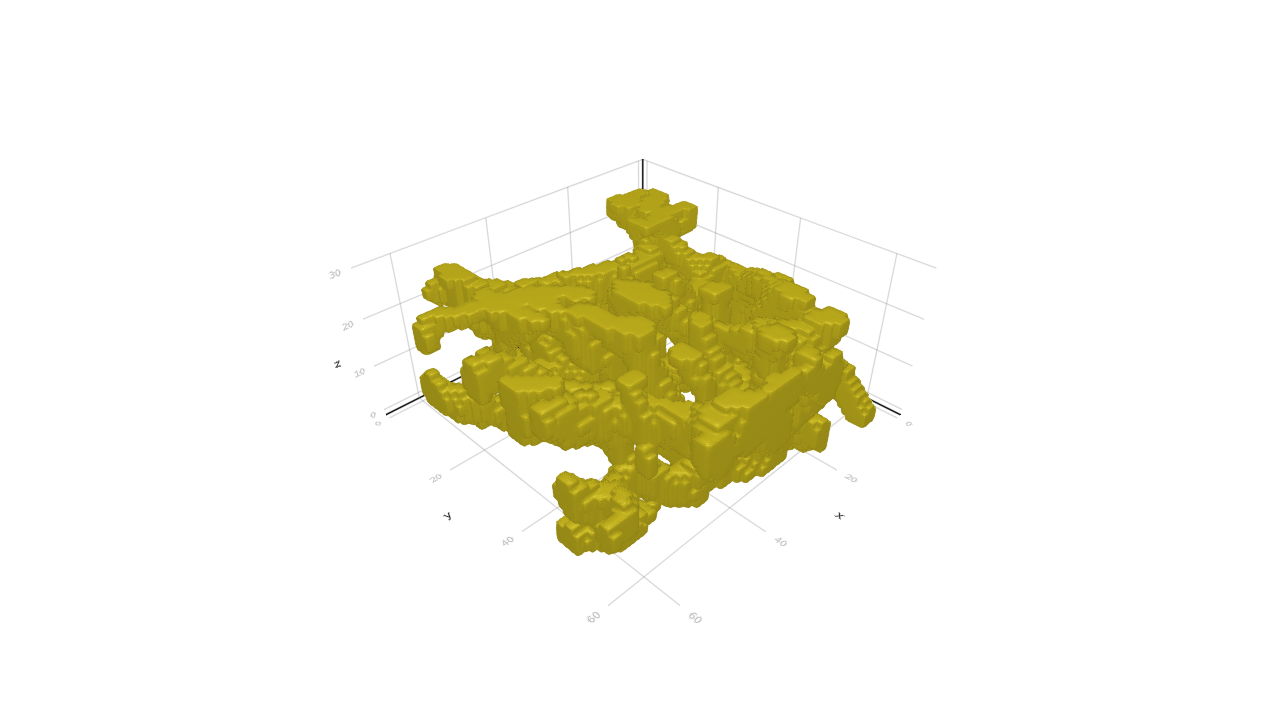

In [32]:
volume(skel1, algorithm = :iso, isorange =1, isovalue = 1.0)


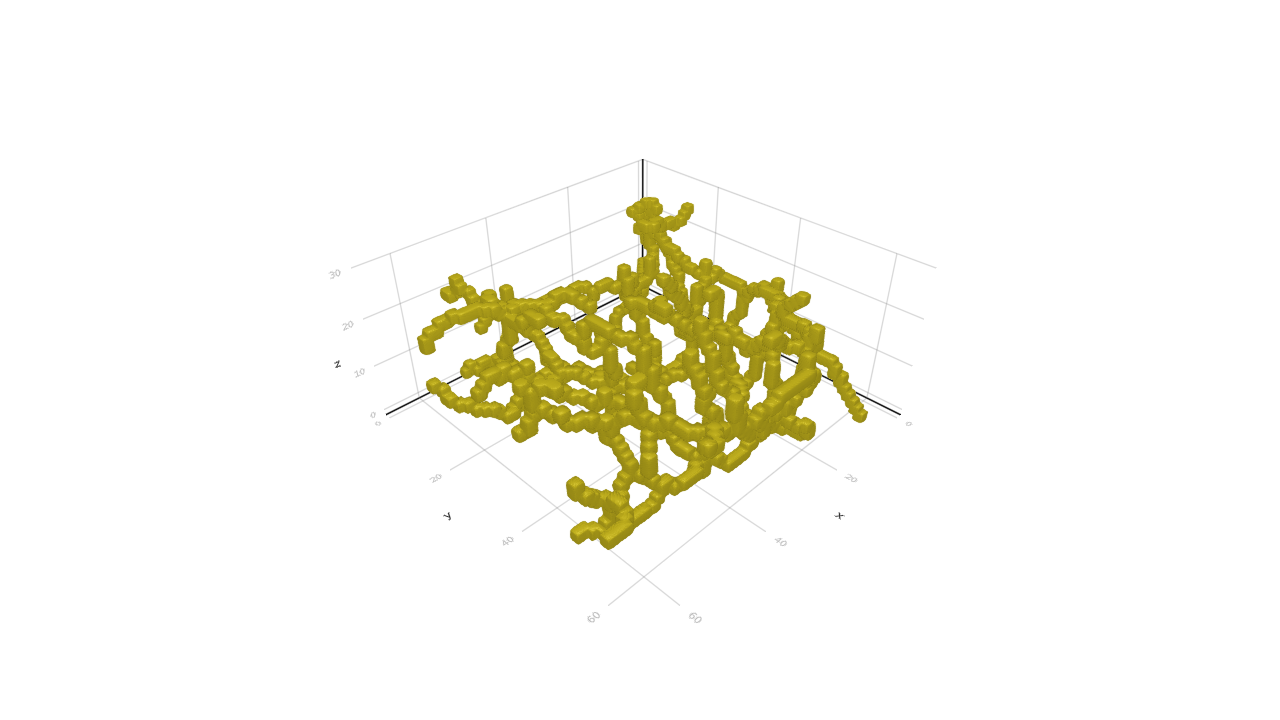

In [33]:
volume(skel, algorithm = :iso, isorange =1, isovalue = 1.0)


## Skel2Graph3D

In [34]:
include("./julia/Skel2Graph3D.jl")

pk_get_nh_idx (generic function with 1 method)

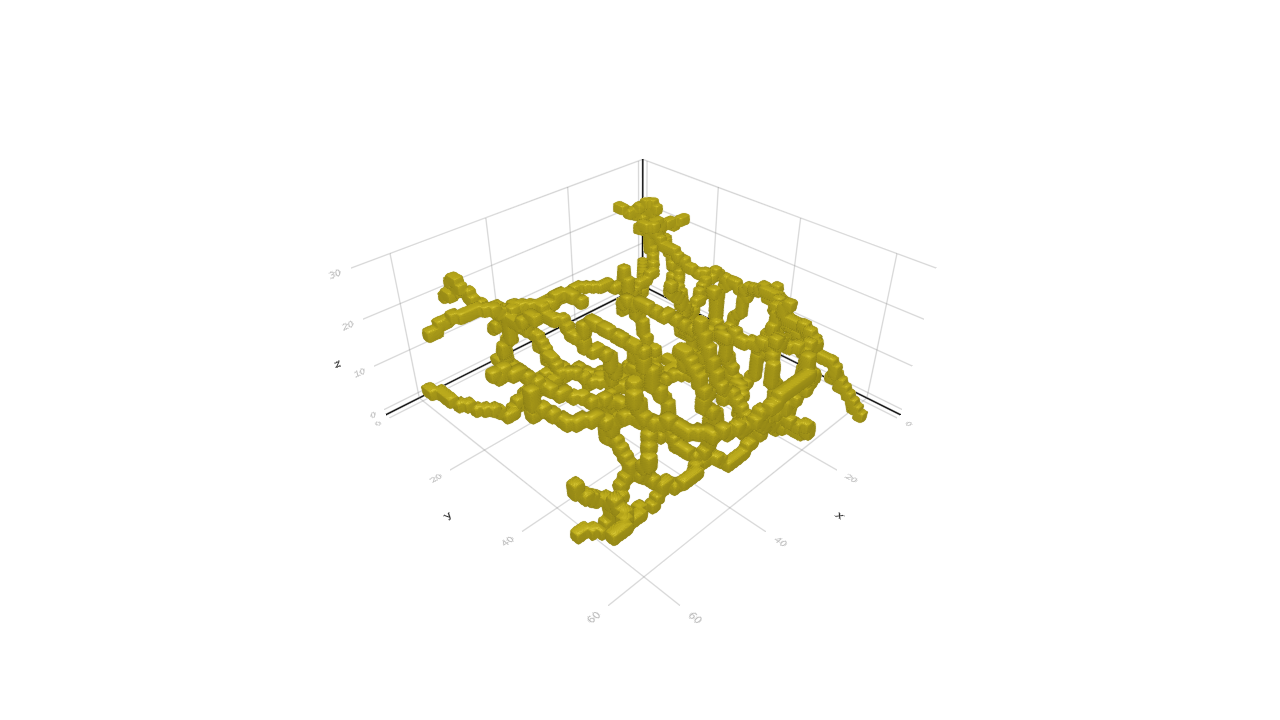

In [48]:
# load example binary skeleton image
# load skel
vars = matread("./julia/skel.mat");
skel=vars["skel"]
skel1=vars["skel"]
w = size(skel,1);
l = size(skel,2);
h = size(skel,3);
threshold=10;

volume(skel, algorithm = :iso, isorange =1, isovalue = 1.0)


In [49]:
# initial step: condense, convert to voxels and back, detect cells
~,node,link = Skel2Graph3D(skel,threshold);


LoadError: UndefVarError: bwconncomp not defined

GLFWError (PLATFORM_ERROR): WGL: Failed to make context current: The operation completed successfully. 
Stacktrace:
 [1] _ErrorCallbackWrapper(::Int32, ::Cstring) at C:\Users\amira\.julia\packages\GLFW\CBo9c\src\callback.jl:43
 [2] MakeContextCurrent at C:\Users\amira\.julia\packages\GLFW\CBo9c\src\glfw3.jl:694 [inlined]
 [3] make_context_current at C:\Users\amira\.julia\packages\GLMakie\AiucZ\src\drawing_primitives.jl:46 [inlined]
 [4] fps_renderloop(::GLMakie.Screen, ::Float64) at C:\Users\amira\.julia\packages\GLMakie\AiucZ\src\rendering.jl:26
 [5] renderloop(::GLMakie.Screen; framerate::Float64) at C:\Users\amira\.julia\packages\GLMakie\AiucZ\src\rendering.jl:48
 [6] renderloop(::GLMakie.Screen) at C:\Users\amira\.julia\packages\GLMakie\AiucZ\src\rendering.jl:41
 [7] (::GLMakie.var"#51#53"{GLMakie.Screen})() at .\task.jl:356


In [ ]:

# total length of network
wl = sum(cellfun("length",node_links));

skel2 = Graph2Skel3D(node,link,w,l,h);
[~,node2,link2] = Skel2Graph3D(skel2,threshold);

# calculate new total length of network
wl_new = sum(cellfun("length",node2_links));

# iterate the same steps until network length changed by less than 0.5#
while (wl_new!=wl)

    wl = wl_new;   
    
     skel2 = Graph2Skel3D(node2,link2,w,l,h);
     [A2,node2,link2] = Skel2Graph3D(skel2,threshold);

     wl_new = sum(cellfun("length",node2_links));

end

# display result
# figure();
# hold on;
# for i=1:length(node2)
#     x1 = node2(i).comx;
#     y1 = node2(i).comy;
#     z1 = node2(i).comz;
    
#     if(node2(i).ep==1)
#         ncol = 'c';
#     else
#         ncol = 'y';
#     end;
    
#     for j=1:length(node2(i).links)    # draw all connections of each node
#         if(node2(node2(i).conn(j)).ep==1)
#             col='k'; # branches are black
#         else
#             col='r'; # links are red
#         end;
#         if(node2(i).ep==1)
#             col='k';
#         end;

        
#         # draw edges as lines using voxel positions
#         for k=1:length(link2(node2(i).links(j)).point)-1            
#             [x3,y3,z3]=ind2sub([w,l,h],link2(node2(i).links(j)).point(k));
#             [x2,y2,z2]=ind2sub([w,l,h],link2(node2(i).links(j)).point(k+1));
#             line([y3 y2],[x3 x2],[z3 z2],'Color',col,'LineWidth',2);
#         end;
#     end;
    
#     # draw all nodes as yellow circles
#     plot3(y1,x1,z1,'o','Markersize',9,...
#         'MarkerFaceColor',ncol,...
#         'Color','k');
# end;
# axis image;axis off;
# set(gcf,'Color','white');
# drawnow;
# view(-17,46);

## Plotting Examples

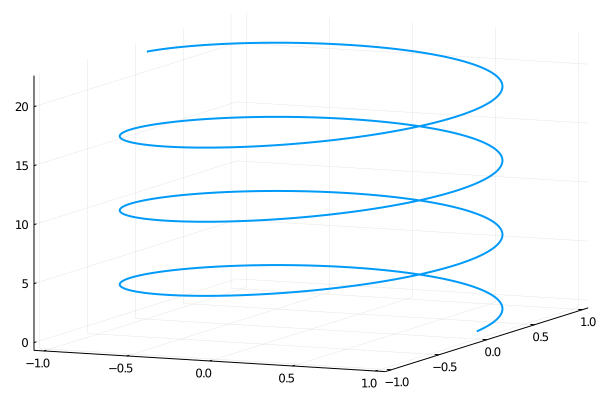

In [58]:

t=0:pi/200:7*pi
x=cos.(t)
y=sin.(t)

plot3d(x,y,t,lw=2,leg=false)

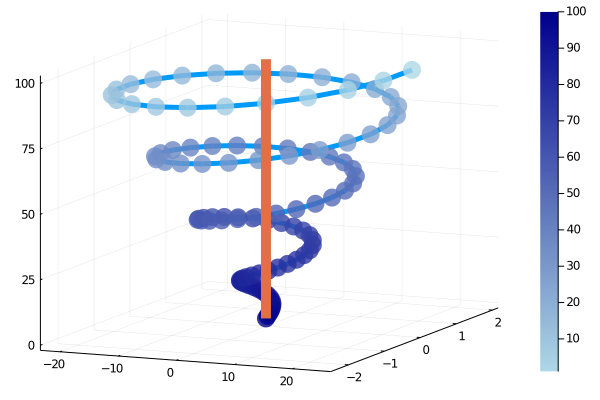

In [60]:
n = 100
ts = range(0, stop = 8π, length = n)
x = ts .* map(cos, ts)
y = (0.1ts) .* map(sin, ts)
z = 1:n
Plots.plot(x, y, z, zcolor = reverse(z), m = (10, 0.8, :blues, Plots.stroke(0)), leg = false, cbar = true, w = 5)
Plots.plot!(zeros(n), zeros(n), 1:n, w = 10)